f1(t) - Mean: 0.015098846350581318 Std Dev: 0.7055999465207561
f2(t) - Mean: 0.7999713579368002 Std Dev: 0.565727415941607
f3(t) - Mean: 0.3990368097200124 Std Dev: 0.23089959538993235


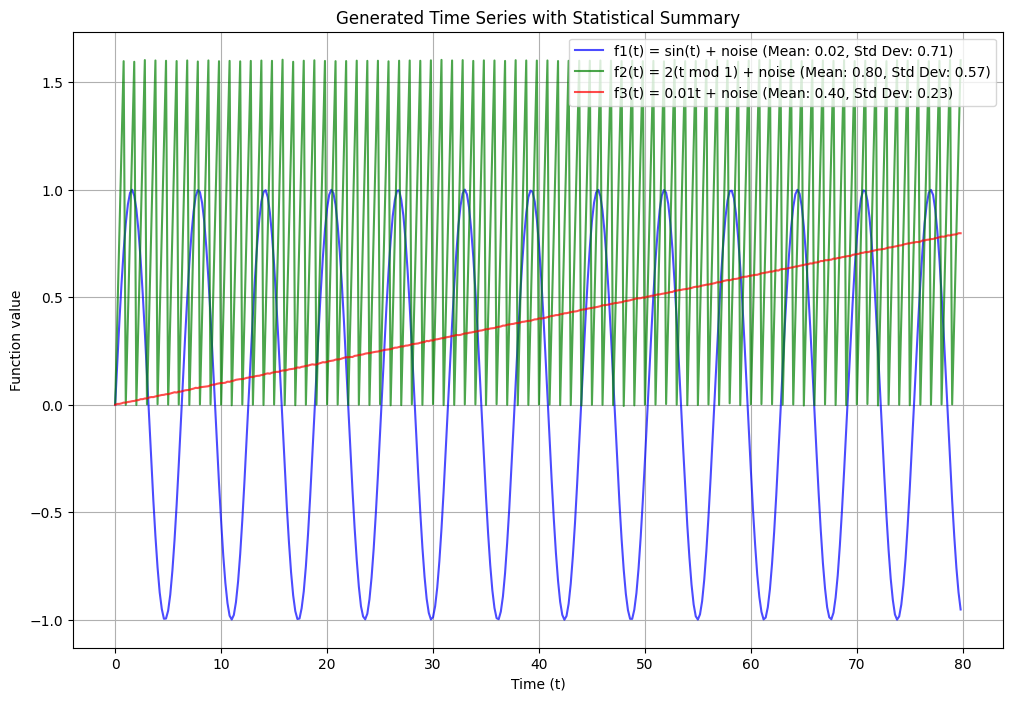

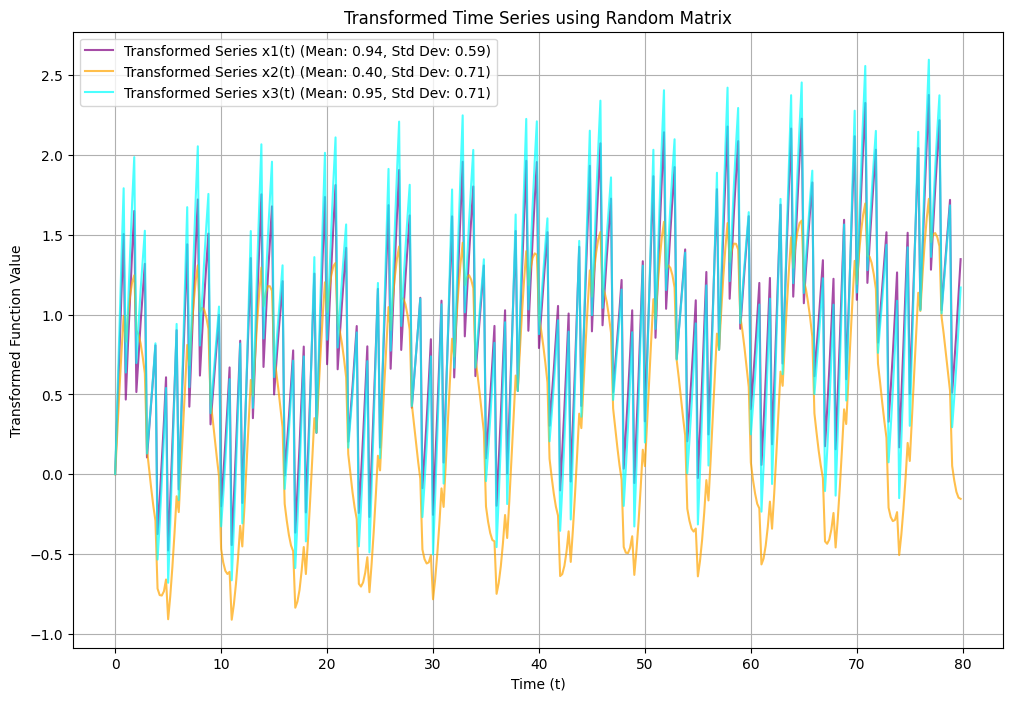

In [144]:
########## Machine Learning In Web - Exercise 2, Practical(a) ##########
## Author : Hakki Egemen Gülpinar, Szymon Czajkowskis
## Date: 09.11.2024
## Subject: Signal Decomposition, Random Matrix Generation, PCA, ICA Reconstruction
#########################################################

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from sklearn.preprocessing import MinMaxScaler



def generate_time_series(t: np.ndarray, noise_scale: float, func) -> np.ndarray:
    """
    Generate time series with Gaussian noise per entry
    t: time variable
    noise_scale: scale of Gaussian noise
    func: function to generate the base time series
    return: time series with noise
    """
    noise = np.random.normal(0, noise_scale, len(t))
    f = func(t)
    return f + noise

def calculate_statistics(f: np.ndarray) -> Tuple[float, float]:
    """
    Calculate mean and standard deviation for the given time series
    f: time series
    return: mean and standard deviation
    """
    return np.mean(f), np.std(f)


def draw_time_series(t: np.ndarray, series: list, xlabel: str, ylabel:str, title: str) -> None:
    """
    Draw the time series with mean and standard deviation
    t: time variable
    series: list of tuples containing (time series, mean, std, title, color)
    """
    plt.figure(figsize=(12, 8))
    for f, mean, std, description, color in series:
        plt.plot(t, f, label=f"{description} (Mean: {mean:.2f}, Std Dev: {std:.2f})", color=color, alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def mse(original_signals: np.array, reconstructed_signals: np.array) -> float:
  """
  Returns mean squared error between original and reconstructed signals
  """
  return np.mean((original_signals.T - reconstructed_signals)**2, axis=0)



####################### Signal decomposition ##################################
# Set the time variable 't' with a range of values 
t = np.arange(0, 80, 0.2) # values can be change for making different tests & analysis

# Define each time series with added Gaussian noise
f1 = generate_time_series(t, noise_scale=0.001, func=np.sin)                 # f1(t) = sin(t) + 0.001*η
f2 = generate_time_series(t, noise_scale=0.002, func=lambda t: 2 * (t % 1))  # f2(t) = 2*(t - floor(t)) + 0.002*η
f3 = generate_time_series(t, noise_scale=0.001, func=lambda t: 0.01 * t)     # f3(t) = 0.01*t + 0.001*η


# Calculate mean and standard deviation for each time series, analyze the statistical properties
f1_mean, f1_std = calculate_statistics(f1)
f2_mean, f2_std = calculate_statistics(f2)
f3_mean, f3_std = calculate_statistics(f3)

# Statistics for each time series
print("f1(t) - Mean:", f1_mean, "Std Dev:", f1_std)
print("f2(t) - Mean:", f2_mean, "Std Dev:", f2_std)
print("f3(t) - Mean:", f3_mean, "Std Dev:", f3_std)


series = [
    (f1, f1_mean, f1_std, "f1(t) = sin(t) + noise", "blue"),
    (f2, f2_mean, f2_std, "f2(t) = 2(t mod 1) + noise", "green"),
    (f3, f3_mean, f3_std, "f3(t) = 0.01t + noise", "red")
]

draw_time_series(t= t, series= series, xlabel="Time (t)", ylabel="Function value", title="Generated Time Series with Statistical Summary")

####################### 3x3 random matrix and x(t)=A⋅f(t)  Transformation ##################################

# Generate a random 3x3 matrix A for transformation
A = np.random.rand(3, 3) #created A matrix

# Stack the time series vertically to form a matrix for multiplication
F = np.vstack([f1, f2, f3]) #created f(t) matrix



transformed_series = A @ F #matrix multiplication, regarding to x(t)=A⋅f(t) 

# Extract each transformed series from the result
x1, x2, x3 = transformed_series

series_to_draw = [
    (x1, *calculate_statistics(x1), "Transformed Series x1(t)", "purple"),
    (x2, *calculate_statistics(x2), "Transformed Series x2(t)", "orange"),
    (x3, *calculate_statistics(x3), "Transformed Series x3(t)", "cyan")
]

draw_time_series(t= t,series= series_to_draw, xlabel="Time (t)", ylabel="Transformed Function Value", title="Transformed Time Series using Random Matrix")


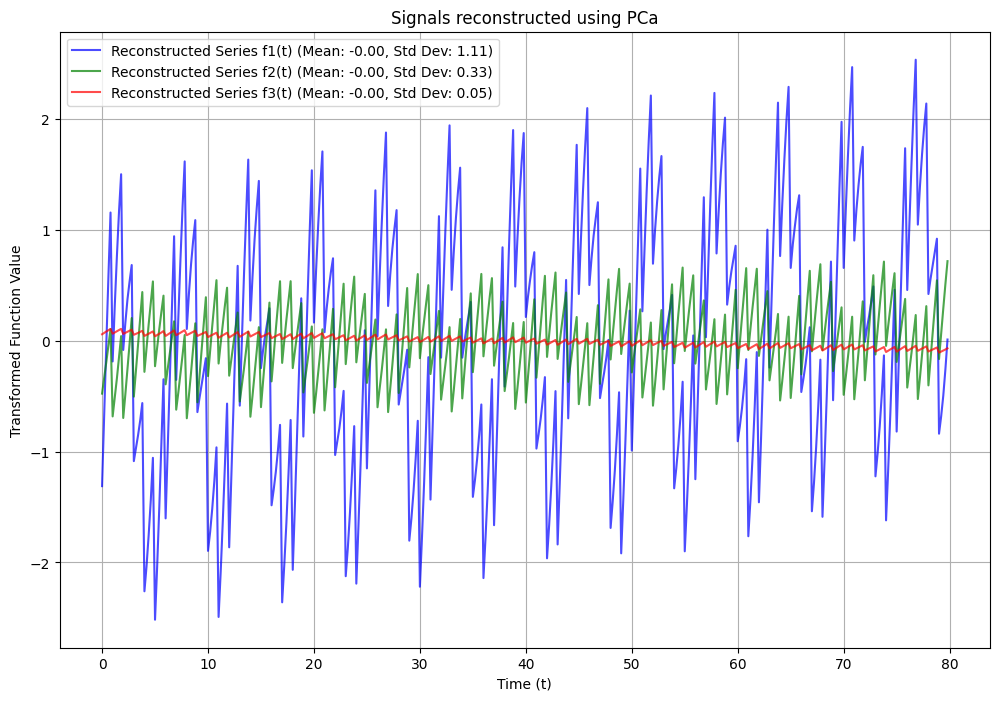

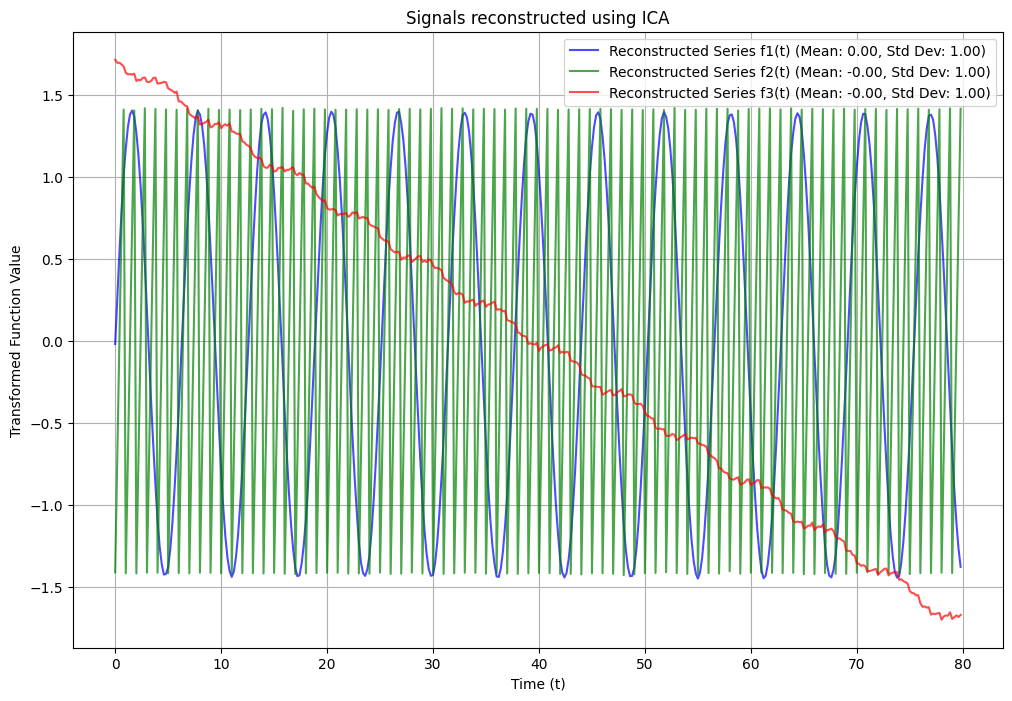

Mean squared error for PCA: [0.43460672 0.76201087 0.23684278]
Mean squared error for ICA: [0.08692636 0.82854716 1.67410512]


In [145]:
from sklearn.decomposition import PCA, FastICA 

pca = PCA(n_components=3)
pca_components = pca.fit_transform(transformed_series.T)

x1, x2, x3 = pca_components.T

series_to_draw = [
    (x1, *calculate_statistics(x1), "Reconstructed Series f1(t)", "blue"),
    (x2, *calculate_statistics(x2), "Reconstructed Series f2(t)", "green"),
    (x3, *calculate_statistics(x3), "Reconstructed Series f3(t)", "red")
]

draw_time_series(t= t,series= series_to_draw, xlabel="Time (t)", ylabel="Transformed Function Value", title="Signals reconstructed using PCa")

ica = FastICA(n_components=3, whiten="unit-variance", random_state=23)
ica_components = ica.fit_transform(transformed_series.T)

x1, x2, x3 = ica_components.T


series_to_draw = [
    (x1, *calculate_statistics(x1), "Reconstructed Series f1(t)", "blue"),
    (x2, *calculate_statistics(x2), "Reconstructed Series f2(t)", "green"),
    (x3, *calculate_statistics(x3), "Reconstructed Series f3(t)", "red")
]

draw_time_series(t= t,series= series_to_draw, xlabel="Time (t)", ylabel="Transformed Function Value", title="Signals reconstructed using ICA")
mse_pca = mse(F, pca_components)
mse_ica = mse(F, ica_components)

print(f"Mean squared error for PCA: {mse_pca}")
print(f"Mean squared error for ICA: {mse_ica}")